### Planetary Orbit & Star Wobble

KeyboardInterrupt: 

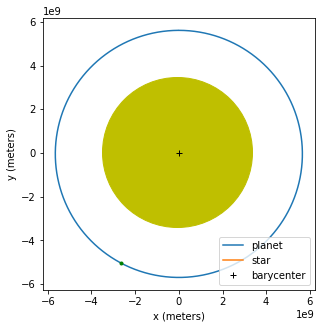

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  9 12:52:35 2021

@author: Erik
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import gravitational_constant
import matplotlib.animation as mpla

# Constants

G = gravitational_constant #Gravitational Constant (Nm^2/kg^2)
M = 1.15 * 1.9891e30 #Mass of the star using Solar masses (kg)
m = 20*5.9722e24 #Mass of the planet using Earth masses (kg)
factor = -M*gravitational_constant
P = 2.476*24*60*60 #period
d = np.cbrt(((P**2) * (G * (M+m))) / (4 * (np.pi**2))) #distance between planet and star
b1 = d / (1 + (M/m)) #distance from star to barycenter
b2 = d - b1 #distance from planet to barycenter
start = 0.0
star_start = 162.0162 # offset so star is in phase with planetary orbit
seconds_per_year = 365*24*60*60
num_years = 6.85e-3
star_years = 0.00223*6.85e-3
end = num_years*seconds_per_year
star_end = star_years*seconds_per_year
stepSize = 1*60#*60    # seconds in one minute
star_step = 0.12

tpoints = np.arange(start,end,stepSize)
star_tpoints = np.arange(start, star_end, star_step)
planet_xpts = []
planet_ypts = []
star_xpts = []
star_ypts = []

# Initial conditions (with some corrections to previous calculations)

planet_distance = b2
star_distance = b1*3e2
planet_velocity = 1.410011504065832000e+01 * b2 *2.091e-6
star_velocity = 1.410011504065832000e+01 * b1 *2.9e-1
planet_r = np.array([0.0,planet_distance],float)
planet_v = np.array([planet_velocity,0.0],float)
star_r = np.array([0.0, star_distance],float)
star_v = np.array([star_velocity, 0.0],float)
refresh = 100


def acceleration(r):
    
    x=r[0]        #unpack the array r into local variables
    y=r[1]
    radius_cubed = (x*x + y*y)**(3/2)
    
    # this returns the acceleration vector
    return factor*r/radius_cubed

current_accel_planet = acceleration(planet_r)
current_accel_star = acceleration(star_r)



# Velocity Verlet algorithm: loop over time
for t in tpoints:
    
    
    planet_xpts.append(planet_r[0])
    planet_ypts.append(planet_r[1])
    
    # velocity Verlet for planet
    planet_v += current_accel_planet*stepSize/2      # update velocity half-way, acceleration saved from before
    planet_r += planet_v*stepSize
    current_accel_planet = acceleration(planet_r)    # update acceleration
    planet_v += current_accel_planet*stepSize/2      # update velocity to the end of time step


for st in star_tpoints:
    star_xpts.append(star_r[0])
    star_ypts.append(star_r[1])
    
    # velocity Verlet for star
    star_v += current_accel_star*star_step/2      # update velocity half-way, acceleration saved from before
    star_r += star_v*star_step
    current_accel_star = acceleration(star_r)    # update acceleration
    star_v += current_accel_star*star_step/2      # update velocity to the end of time step

    
# plot results
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,5),sharex=True)
ax.plot(planet_xpts,planet_ypts, label = 'planet')
ax.plot(star_xpts, star_ypts, label = 'star')
plt.rcParams['animation.embed_limit'] = 2**128
orbit, = ax.plot(0, 0, 'go', markersize = 3)
wobble, = ax.plot(0, 0, 'yo', markersize = 150)
orbit.set_data(planet_xpts[0], planet_ypts[0])
wobble.set_data(star_xpts[0], star_ypts[0])

ax.plot(b1, 'k+', label = 'barycenter')
ax.set_xlabel("x (meters)")
ax.set_ylabel("y (meters)")
ax.legend(loc = 'lower right')
plt.gca().set_aspect('equal', adjustable='box')

def animation(i):
    if i > 0:
        ax.cla
        orbit.set_data(planet_xpts[i], planet_ypts[i])
        wobble.set_data(star_xpts[i], star_ypts[i])
        return orbit, wobble
ani = mpla.FuncAnimation(fig, animation, frames = 3601, interval = 100, repeat = True)  #3601

from IPython.display import HTML
HTML(ani.to_jshtml())

loc = r"C:\Users\Erik\Desktop/Planet_orbit.gif" 
writergif = mpla.PillowWriter(fps=60) 
ani.save(loc, writer=writergif)
plt.show()


### Spectrograph Doppler Shift Example

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as mpla
import numpy as np


red = [620, 750]
orange = [590, 620]
yellow = [570, 590]
green = [495, 570]
blue = [450, 495]
violet = [380, 450]


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,5),sharex=True)
plt.xlim((violet[0], red[1]))
plt.ylim(10)
plt.fill_betweenx([0, 10], red[0], red[1], color = 'red')
plt.fill_betweenx([0, 10], orange[0], orange[1], color = 'orange')
plt.fill_betweenx([0, 10], yellow[0], yellow[1], color = 'yellow')
plt.fill_betweenx([0, 10], green[0], green[1], color = 'green')
plt.fill_betweenx([0, 10], blue[0], blue[1], color = 'blue')
plt.fill_betweenx([0, 10], violet[0], violet[1], color = 'violet')
plt.vlines(445, 0, 10, color = 'black', linestyles = 'dashed')
plt.vlines(550, 0, 10, color = 'black', linestyles = 'dashed')
plt.vlines(600, 0, 10, color = 'black', linestyles = 'dashed')
plt.vlines(650, 0, 10, color = 'black', linestyles = 'dashed')
plt.vlines(570, 0, 10, color = 'black', linestyles = 'dashed')
plt.tick_params(axis = 'y', which = 'both', left = False, labelleft = False)
plt.gca().set_aspect(10, adjustable='box')

plt.rcParams.update({
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  # transparent axes
    "savefig.facecolor": (0.0, 0.0, 0.0, 0.0),  
})
    
line1 = 435
line2 = 540
line3 = 590
line4 = 640
line5 = 560
refresh = 100
l1 = ax.axvline(line1, ls = '-', color = 'black')
l2 = ax.axvline(line2, ls = '-', color = 'black')
l3 = ax.axvline(line3, ls = '-', color = 'black')
l4 = ax.axvline(line4, ls = '-', color = 'black')
l5 = ax.axvline(line5, ls = '-', color = 'black')


def animation(i):
    if i >= 0:
        l1.set_xdata([line1 + i, line1 + i])
        l2.set_xdata([line2 + i, line2 + i])
        l3.set_xdata([line3 + i, line3 + i])
        l4.set_xdata([line4 + i, line4 + i])
        l5.set_xdata([line5 + i, line5 + i])
    
ani = mpla.FuncAnimation(fig, animation, frames = 20, interval = refresh, repeat = True)  

from IPython.display import HTML
HTML(ani.to_jshtml())

loc = r"C:\Users\Erik\Desktop/Doppler_shift.gif" 
writergif = mpla.PillowWriter(fps=30) 
ani.save(loc, writer=writergif)
plt.show()